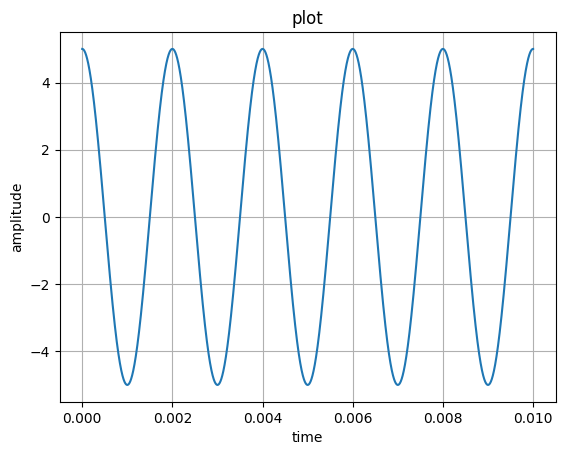

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.01, 10000)

y = 5 * np.sin(2 * np.pi * 500 * t + np.deg2rad(90))

plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("plot")
plt.grid(True)
plt.show()


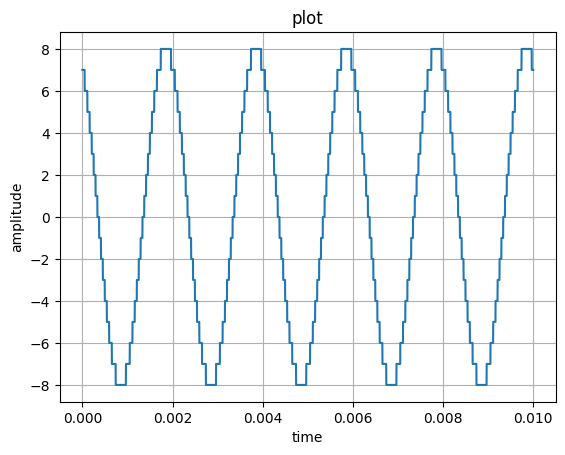

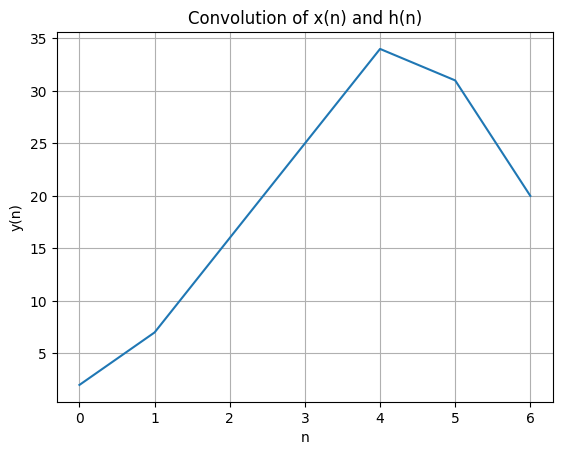

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define x(n) and h(n)
x = np.array([1, 2, 3, 4, 5])
h = np.array([2, 3, 4])

# Calculate y(n) using convolution
y = np.convolve(x, h)

# Generate the range of n values
n = np.arange(len(y))

# Plot y(n)
plt.plot(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Convolution of x(n) and h(n)')
plt.grid(True)
plt.show()

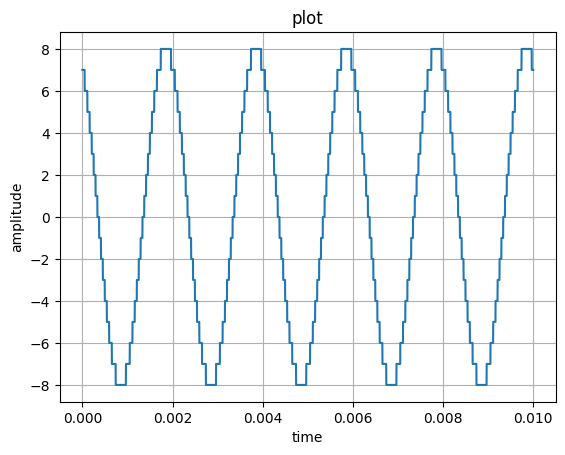

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

t = np.linspace(0, 0.01, 10000)

y = (5 * np.sin(2 * np.pi * 500 * t + 90))

y_quantized = (8/5*y)

y_quantized = np.round(y_quantized)

plt.plot(t, y_quantized)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("plot")
plt.grid(True)
plt.show()


# DFT for book example

[ 3.53553391e-01+0.00000000e+00j -1.08006748e+00+3.14904259e+01j
  1.24951431e+01-1.07173995e+01j -3.03887530e-01+1.44732437e-02j
 -1.13893239e-01-5.34676799e-02j -5.72614627e-02-5.62388786e-02j
 -3.15708065e-02-5.13298645e-02j -1.74800828e-02-4.57191403e-02j
 -8.84010780e-03-4.06352637e-02j -3.13353145e-03-3.62389874e-02j
  8.42513338e-04-3.24638325e-02j  3.72698355e-03-2.92058642e-02j
  5.88670213e-03-2.63691092e-02j  7.54521613e-03-2.38743309e-02j
  8.84538026e-03-2.16582777e-02j  9.88208533e-03-1.96708585e-02j
  1.07204222e-02-1.78723105e-02j  1.14062672e-02-1.62308510e-02j
  1.19727094e-02-1.47208474e-02j  1.24440920e-02-1.33214211e-02j
  1.28386302e-02-1.20153903e-02j  1.31701530e-02-1.07884656e-02j
  1.34492880e-02-9.62863520e-03j  1.36842835e-02-8.52569156e-03j
  1.38815896e-02-7.47086226e-03j  1.40462744e-02-6.45651986e-03j
  1.41823255e-02-5.47595053e-03j  1.42928717e-02-4.52316738e-03j
  1.43803447e-02-3.59275737e-03j  1.44465986e-02-2.67975336e-03j
  1.44929970e-02-1.779525

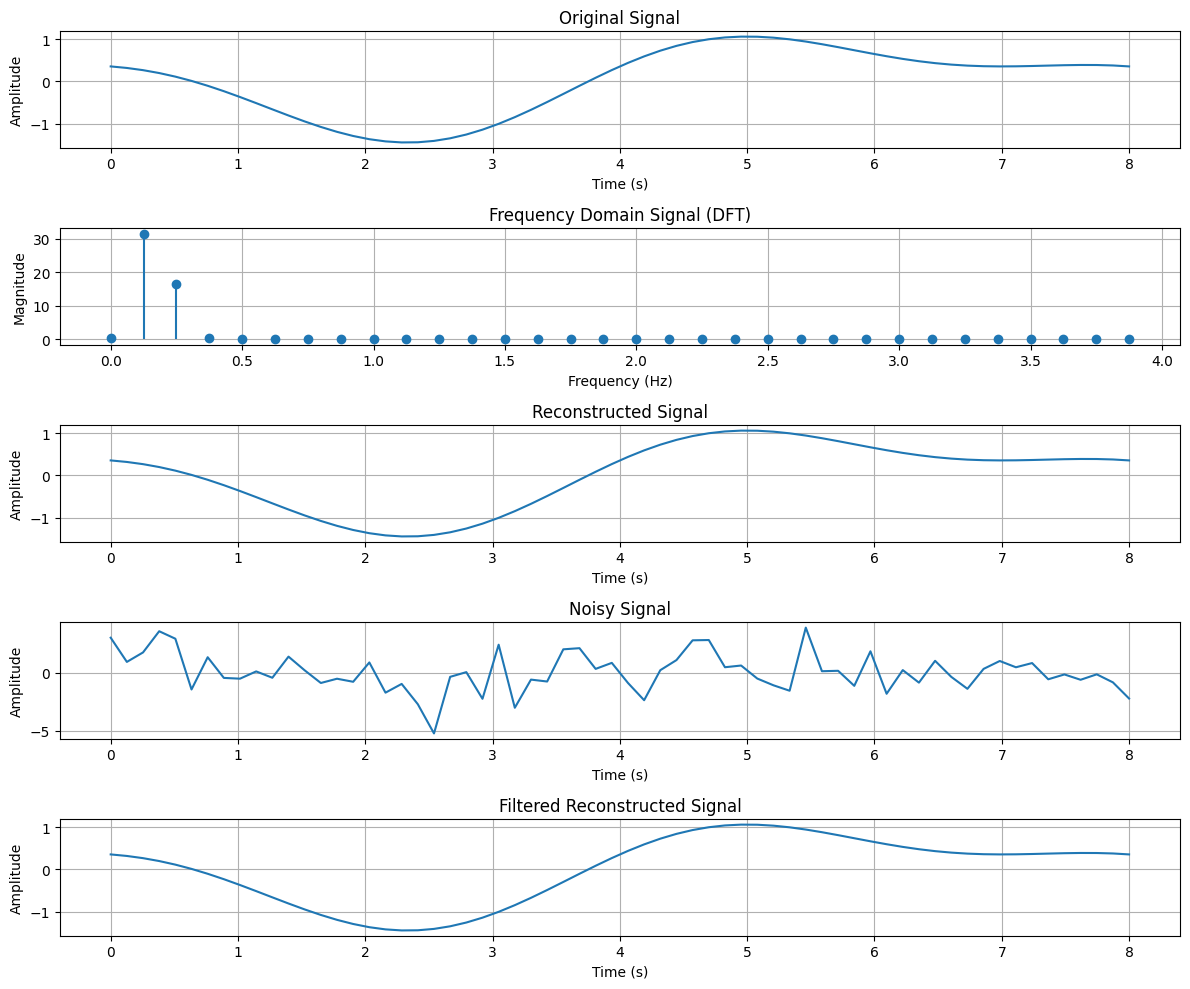

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
total_plots = 5

sampling_rate = 8
duration = 1
t = np.linspace(0, duration, int(sampling_rate * duration))

x_t = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.subplot(total_plots, 1, 1)
plt.plot(t, x_t)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

X_f = dft(x_t)

print(X_f)

N = len(X_f)
frequencies = np.fft.fftfreq(N, 1 / sampling_rate)

plt.subplot(total_plots, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(X_f[:N // 2]), basefmt=" ")
plt.title('Frequency Domain Signal (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)


def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

x_t_reconstructed = idft(X_f)

plt.subplot(total_plots, 1, 3)
plt.plot(t, x_t_reconstructed.real)
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


np.random.seed(0)
noise = 1.5 * np.random.randn(len(x_t))
noisy_signal = x_t + noise

plt.subplot(total_plots, 1, 4)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


cutoff_freq = 100
H = np.zeros_like(X_f)
H[:cutoff_freq] = 1
H[-cutoff_freq:] = 1
filtered_signal = x_t_reconstructed * H

plt.subplot(total_plots, 1, 5)
plt.plot(t, filtered_signal.real)
plt.title('Filtered Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


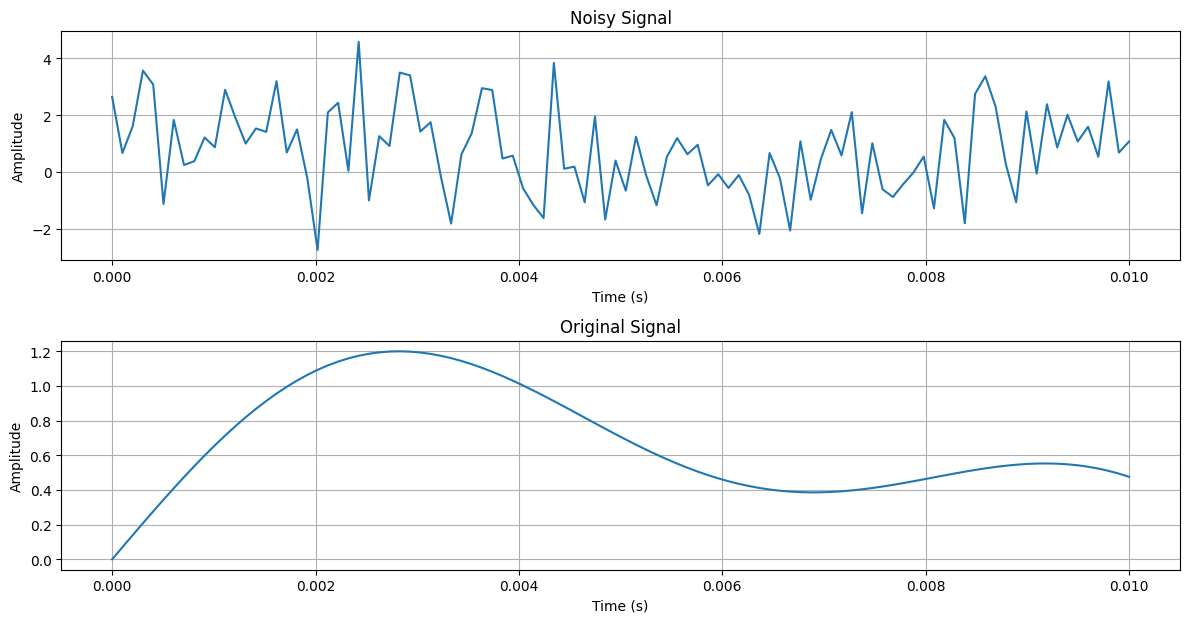